# Ordinary Least Squares (OLS) Method : <font color=red> Effect of Outliers</font>


The goal of this notebook is to observe the effect of outliers on the OLS method. 

Consider the "squared average" loss function used in the OLS method.

$L(\vec w) = \displaystyle\sum_{i=1}^{n} (y_i - \vec w^T.\vec x_i)^2$

It arises naturally when we apply the Maximum Likelihood Estimation (MLE) approach to estimate the weight vector $\vec w$ by assuming that the target variable y is distributed normally:

$p(y | x) = \frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{(y - w^T.x)^2}{2\sigma^2}}$

Because of the **Gaussian distribution of the target**, the OLS method is not robust to outliers. The Gaussian distribution dies away too quickly (thin tail). Hence, it doesn’t associate any probability to the outliers.


We perform two experients to illustrate the fact that OLS (or MLE with target having Gaussian distribution) doesn't provide a good estimation in presence of outliers.

- Experiment 1: No Outliers
- Experiment 2: Effect of Outliers


For the experimentation, will use a small synthetic dataset with 1D feature. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score

## Experiment 1: No Outliers

Weight Vectors:
 [[4.51454862]
 [2.99817328]]

Mean squared error: 0.09

Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.97


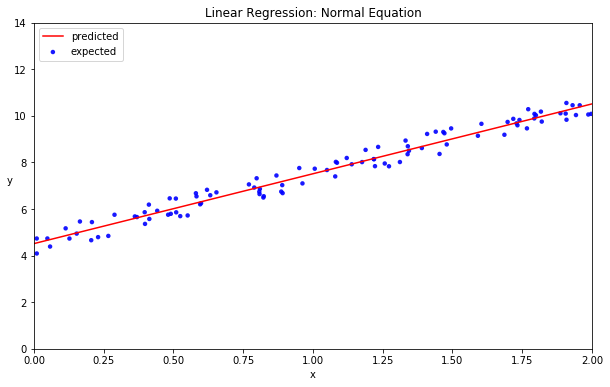

In [2]:
# Linear Regresion: Single Feature using Normal Equation (synthetic data)



np.random.seed(43)

m = 100  # no. of training examples

# Assume that this problem has a 1D feature matrix "X" 
# Create X and y vectors with m training data 
# For this toy problem, we create the training data randomly
# Note: both X and y should be m x 1 vectors

X = 2 *np.random.rand(m,1)

y = 4 + 3*X + np.random.rand(m,1)


# Add a bias term with the feature vector
# The bias term should be 1
X_bias = np.c_[np.ones((m,1)),X]


# Normal Equation closed form solution (OLS) for weight vector w
w = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)

print("Weight Vectors:\n", w)


# Make prediction 
y_predicted = X_bias.dot(w)


print("\nMean squared error: %.2f"
      % mean_squared_error(y, y_predicted))


# Explained variance score: 1 is perfect prediction
print("\nCoefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y, y_predicted))



# Plot the predicted line on the training data points (X, y)
# Step 1: define two endpoints on the x-axis
# Step 2: add the bias term: a 2 X 1 dimensional matrix of 1s
# Step 3: find the predicted y-values for these two x points using the theta

X_endpoints = np.array([[0], [2]])
X_endpoints_with_ones = np.c_[np.ones((2,1)),X_endpoints]
y_endpoints_predicted = X_endpoints_with_ones.dot(w)



# Draw a scatter plot
fig = plt.figure(figsize=(10, 6))
plt.scatter(X,y,alpha=0.9, c="blue", edgecolors='none', s=20, label="expected")
plt.plot(X_endpoints, y_endpoints_predicted, "r-", label="predicted")
plt.xlim(0,2)
plt.ylim(0,14)
plt.title("Linear Regression: Normal Equation")
plt.legend(loc=2)
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.show()

## Experiment 2: Effect of Outliers

Weight Vectors:
 [[11.8248265 ]
 [-2.02232771]]

Mean squared error: 154.49

Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.01


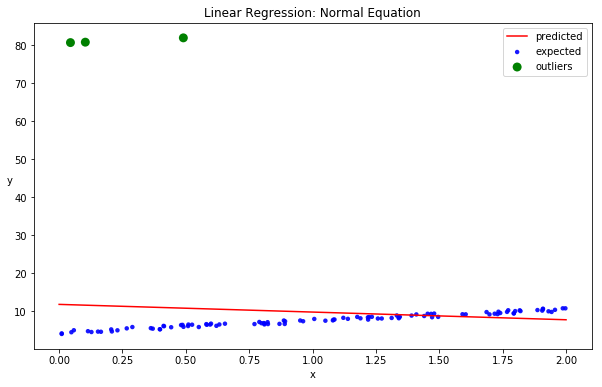

In [3]:
# Linear Regresion: Single Feature using Normal Equation (synthetic data)


np.random.seed(43)

m1 = 100  # no. of training examples
m2 = 3    # no. of outliers

m = m1 + m2

# Assume that this problem has only one feature "X" and a label "y"
# Create X and y vectors with m training data 
# For this Toy problem, we create the training data randomly
# Note: both X and y should be m x 1 vectors
x1 = 2 *np.random.rand(m1,1)

# These are outlier data points
x2 = 1 *np.random.rand(m2,1)


# Mix outliers with the dataset
X = np.concatenate((x1, x2), axis=0)


y1 = 4 + 3*x1 + np.random.rand(m1,1)
y2 = 80 + 3*x2 + np.random.rand(m2,1)

y = np.concatenate((y1, y2), axis=0)



# Add a bias term with the feature vector
# The bias term should be 1
X_bias = np.c_[np.ones((m,1)),X]


# Normal Equation closed form solution for weight vector w
w = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)

print("Weight Vectors:\n", w)


# Make prediction 
y_predicted = X_bias.dot(w)


print("\nMean squared error: %.2f"
      % mean_squared_error(y, y_predicted))


# Explained variance score: 1 is perfect prediction
print("\nCoefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y, y_predicted))



# Plot the predicted line on the training data points (X, y)
# Step 1: define two endpoints on the x-axis
# Step 2: add the bias term: a 2 X 1 dimensonal matrix of 1s
# Step 3: find the predicted y-values for these two x points using the theta

X_endpoints = np.array([[0], [2]])
X_endpoints_with_ones = np.c_[np.ones((2,1)),X_endpoints]
y_endpoints_predicted = X_endpoints_with_ones.dot(w)



# Draw a scatter plot
fig = plt.figure(figsize=(10, 6))
plt.scatter(x1,y1,alpha=0.9, c="blue", edgecolors='none', s=20, label="expected")
plt.scatter(x2,y2,alpha=1.0, c="green", edgecolors='none', s=80, label="outliers")
plt.plot(X_endpoints, y_endpoints_predicted, "r-", label="predicted")
# plt.xlim(0,2)
# plt.ylim(0,14)
plt.title("Linear Regression: Normal Equation")
plt.legend(loc='best')
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.show()
